## Naive Bayes   
The Naïve Bayes classifier is a simple yet powerful probabilistic algorithm used for classification tasks. It is based on Bayes' Theorem and assumes that the features are conditionally independent, given the class label. Despite its simplicity, it performs well in many real-world applications, such as spam detection, sentiment analysis, and medical diagnosis.

### Approximating the Bayes Classifier
Naïve Bayes is a probabilistic classifier, and before we delve into its mechanics, we establish first some terminology to describe the probabilties that we are dealing with.
```{prf:definition} Probabilistic Machine Learning Speak
Given two random variables $\vvec{x}$ and $y$, where $\vvec{x}$ is the random variable of the observations of a dataset and $y$ is the random variable of the class label. We define then the following probabilities:
* $p(y\mid \vvec{x})$ is the **posterior probability** (the probability of class $y$ given observation $\vvec{x}$ )
* $p(\vvec{x}\mid y)$ is the **likelihood** (how likely is it to observe $\vvec{x}$ in class $y$?)
* $p(y)$ is the **prior probability** (how often do I expect class $y$ to occur in my dataset?)
* $p(\vvec{x})$ is the **evidence** (how probable is observation $\vvec{x}$?)
```
The motivation for the Naive Bayes classifier is to approximate the Bayes optimal classifier $y^*=\argmax_y p^*(y\mid\vvec{x})$ under simplifying assumptions. To estimate $p*(y\mid\vvec{x})$, Naive Bayes uses the Bayes rule. 
````{prf:theorem} Bayes rule
:label: bayes_rule
Given two random variables $x$ and $y$, then te Bayes rule is given as
$$ p(y \mid x) = \frac{p(x \mid y) \, p(y)}{p(x)}$$ 
````
The Bayes rule indicates that we can compute the unkown prediction probability $p^*(y\mid \vvec{x})$ by means of three probabilities: the likelihood, the prior probability and the evidence. The prior probabilities $p(y)$ we can simply estimate as the fraction of observations with label $y$ in the dataset. Further, we can neglect the evidence when we want to predict the posterior probability, since
\begin{align*}
\argmax_y p(y\mid \vvec{x}) &= \argmax_y p(y\mid \vvec{x})p(\vvec{x})\\
&= p(\vvec{x}\mid y)p(y).
\end{align*}
Hence, the only thing that is left to estimate is $p(\vvec{x}\mid y)$. To do so, Naive Bayes makes a simplifying assumption.

````{prf:property} Naive Bayes assumption
We assume that all features are conditionally independent given the class $y$. In this case, we can write
```{math}
:label: naive_assumption
p({\bf x} \mid y) = p(x_1 \mid y)\cdot p(x_2\mid y) \ldots \cdot p(x_d\mid y) .
```
````
Under this assumption, we can now define the inference (prediction step) of the Naive Bayes classifier. 
### Inference
Using Bayes’ Theorem and the Naïve assumption, the prediction is made by choosing the class  that maximizes the posterior probability $p(y\mid x)$.
````{prf:definition} NB classifier
The naive Bayes classifier computes the probabilities that observation $\vvec{x}$ orrcurs together with label $y$ under the naive Bayes assumption: 
```{math}
:label: f_nb
f_{nb}(\vvec{x})_y = p(y)\prod_{k=1}^d p(x_k\mid y)
```
As a result, the naive Bayes classifier predicts the most likely label, given observation $\vvec{x}$:
```{math}
:label: yhat_nb
\begin{align*}
\hat{y} & = \argmax_y\ f_{nb}(\vvec{x})_y\\
&= \argmax_y\ p(y\mid \vvec{x})
\end{align*}
```
````
The inference of Naive Bayes is quick if we have already stored all the probabilities $p(x_k \mid y)$. 

Good applications of Naive Bayes justify the assumption of conditional assumption of features, given the class. This assumption is for example given in text classification. The features are here usually the word frequencies in a text document or the binary presence of words. Although word occurrences are generally not independent from each other, individual word occurrences can give strong independent signals to the classifier. Think of the word "viagra" when training a spam-detector. Also in medical diagnosis, Naive Bayes can be useful if the features are not strongly correlated. That is, a prediction of a patient condition based on a set of features like "Blood pressure", "heart rate", and "cholesterol levels" is not a suitable application of Naive Bayes, since these features are strongly correlated.     
#### Implementation Practice: log probabilities
The classifier $f_{nb}$ multiplies $d+1$ probabilities that have values in $[0,1]$. Especially for a high dimensional feature space (when $d$ is large), the probabilities of $f_{np}$ will be so close to zero that we run into numerical computation problems, such that nonzero probabilities are rounded to zero in floating-point precision. This effect is called _numerical underflow_. We can observe this effect in a minimal running example. 

In [37]:
import numpy as np

# Generate 1000 random numbers in [0,1]
numbers = np.random.uniform(0, 1, 1000)
product = np.prod(numbers)

print(f"Product of 1000 numbers: {product:.6e}, is the product equal to zero? {product ==0}")  # Exponential notation for clarity

Product of 1000 numbers: 0.000000e+00, is the product equal to zero? True


We can deal with underflow by computing the log-probabilities instead. After all, it doesn't matter if we compute the prediction $y$ that maximizes $p(y\mid \vvec{x})$ or the $\log p(y\mid \vvec{x})$, since the logarithm is a monotonically increasing function. As a result, we compute our classifications as 
\begin{align*}
    \hat{y} & = \argmax_y\ \log f_{nb}(\vvec{x})_y\\
&= \argmax_y\ \log(p(y)\prod_{k=1}^d p(x_k\mid y))\\
& = \argmax_y\ \log p(y) + \sum_{k=1}^d \log p(x_k\mid y)
\end{align*}
Using this log-probability trick, we get the following result for our minimal example: 

In [38]:
np.sum(np.log(numbers))

-1054.4618137121709

### Multinomial Naive Bayes
If we have discrete features $x_k\in\mathcal{X}_k$, where $\mathcal{X}_k$ is a finite set, then we can assume multinomial probabilities $p(x_k\mid y)$ that are approximated over the counts: 
\begin{align*}
p(x_k = a\mid y=l) = \frac{\lvert\{ 1\leq i \leq n\mid {\vvec{x}_i}_k = a, y_i=l \}\rvert}{\lvert\{1\leq i \leq n\mid y_i = l\}\rvert}.
\end{align*}
Every probability $p(x_k = a\mid y=l)$ is approximated as the number of observations where feature $x_k$ is equal to value $a$ and the label is $y_i=l$ over the number of observations where the label is $l$. 
#### Implementation Practice: Laplace Smoothing
Using the standard estimation of multinomial probabilities has the undesirable effect that some probabilities $p(x_k = a\mid y=l)$ are equal to zero if the feature $x_k$ is never equal to value $a$ in class $y$. In this case, the classifier probabilities $f_{nb}(\vvec{x})_y$ is equal to zero for all observations $\vvec{x}$ where $x_k=a$. In particular if we have many classes, a high-dimensional feature space or features with a large domain (if $\mathcal{X}_k$ is large), this effect might happen quite often. Laplace smoothing mitigates this effect by adding $\alpha$ imaginary observations for each value of $x_k$ and class $y$.
````{prf:definition} Laplace smoothing
Given a dataset $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n\}$ and feature $x_k$ attaining values in the finite set $\mathcal{X}_k$. The class-conditioned multinomial probability estimations with Laplace smoothing with variable $\alpha> 0$ are then given as 
```{math}
:label: freq_approx3
p_\alpha(x_{k} =a\mid y=l) = \frac{\lvert\{ 1\leq i \leq n\mid {\vvec{x}_i}_k = a, y_i=l \}\rvert+\alpha}{\lvert\{1\leq i \leq n\mid y_i = l\}\rvert+\alpha \lvert\mathcal{X}_k\rvert}
```
````
Note that adding $\alpha \lvert\mathcal{X}_k\rvert$ to the denominator makes the conditioned probability estimations with Laplace smoothing sum up to one:
\begin{align*}
\sum_{a\in \mathcal{X}_k} p_\alpha(x_{k} =a\mid y=l) 
& = \sum_{a\in \mathcal{X}_k} \frac{\lvert\{ i\mid {\vvec{x}_i}_k = a, y_i=l \}\rvert+\alpha}{\lvert\{i\mid y_i = l\}\rvert+\alpha \lvert\mathcal{X}_k\rvert}\\
& =  \frac{\sum_{a\in \mathcal{X}_k}( \lvert\{ i\mid {x_i}_k = a, y_i=l \}\rvert+\alpha)}{\lvert\{i\mid y_i = l\}\rvert+\alpha \lvert\mathcal{X}_k\rvert}\\
&= 1.
\end{align*}
#### Training

```{prf:example}
We consider the following toy dataset, where the task is to predict whether the email is spam, based on the words "free", "win", "offer" and "meeting".

| Contains "Free"? | Contains "Win"? | Contains "Offer"? | Contains "Meeting"? | Spam |
|----------------|----------------|----------------|----------------|------------|
| Yes            | No             | Yes            | No             | Yes        |
| No             | Yes            | No             | Yes            | No         |
| Yes            | Yes            | Yes            | No             | Yes        |
| No             | No             | No             | Yes            | No         |
| Yes            | No             | No             | Yes            | No         |
| No             | Yes            | Yes            | No             | Yes        |

We compute the probabilities of the word "free" conditioned on whether it is in a spam email or not, using Laplace smoothing parameter $\alpha=1$. The domain of the feature "free" is "yes" and "no", hence, $\lvert \mathcal{X}_{free}\rvert=2$.
\begin{align*}
p(free = yes\mid spam=yes) &= \frac{2 +1}{3+2} = \frac{3}{5}\\
p(free = no\mid spam=yes) &= \frac{1 +1}{3+2} = \frac{2}{5}\\
p(free = yes\mid spam=no) &= \frac{1 +1}{3+2} = \frac{2}{5}\\
p(free = no\mid spam=no) &= \frac{2 +1}{3+2} = \frac{3}{5}\\
\end{align*}
```

### Gaussian Naive Bayes
If feature $x_k$ attains continuous values, then a popular choice is to assume a Gaussian distribution for the class-conditioned probabilities:
\begin{align*}
p(x_k = a\mid y=l) = \frac{1}{\sqrt{2\pi \sigma_{kl}^2}}\exp\left(-\frac{(a-\mu_{kl})^2}{2\sigma_{kl}^2}\right).
\end{align*}
The parameter $\mu_{kl}$ is the estimated mean value $\sigma_{kl}$ is the estimated variance of feature $x_k$ in class $y$.
* $\mu_{kl} = \frac{1}{\lvert\{i\mid y_i=l\}\rvert}\sum_{i:y_i=l} {x_i}_k $
* $\sigma_{kl}^2 = \frac{1}{\lvert\{i\mid y_i=l\}\rvert} \sum_{i:y_i=l} ({x_i}_k-\mu_{kl})^2$

Note that the definition of the conditional probability for Gaussian naive Bayes is mathematically not exactly clean, since we have on the right side a probability _distribution_ and not an actual probability. For practical purposes this is ok, since Naive Bayes relies on a comparison between likelihoods of feature values given a class.     

#### Decision Boundaries
We plot the decision making process of Gaussian Naive Bayes below. The plot below shows the log probabilities of the joint distribution $\log p(x,y)$ for each of the two classes. The more intense the color, the higher the log-probability of the corresponding class. We observe the Gaussians that are fit for each class on each axis result in an ellipse-shaped levelset.  

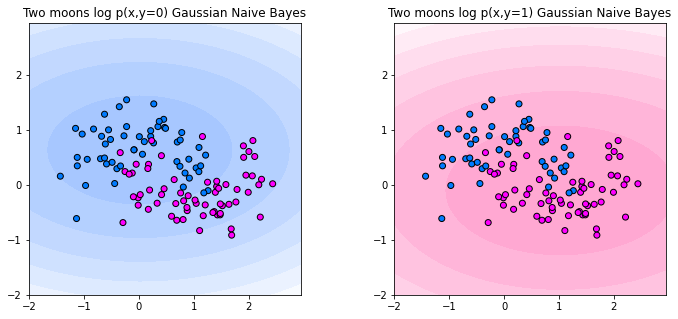

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.datasets import make_moons


X,y = make_moons(noise=0.3, random_state=0, n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
cm_0 = LinearSegmentedColormap.from_list("mycmap", ["#ffffff","#a0c3ff"])
cm_1 = LinearSegmentedColormap.from_list("mycmap", ["#ffffff", "#ffa1cf"])
cmaps = [cm_0,cm_1]
cm_points = ListedColormap(["#007bff", "magenta"])
for ax, k in zip(axs, (0,1)):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train)
    x = np.arange(-2, 3, 0.05)
    y = np.arange(-2, 3, 0.05)

    xx, yy = np.meshgrid(x, y)
    X = np.array([xx,yy]).reshape(2,x.shape[0]*y.shape[0]).T
    Z = gnb.predict_joint_log_proba(np.c_[xx.ravel(), yy.ravel()])
    h = ax.contourf(x,y,Z[:,k].reshape((y.shape[0],x.shape[0])),cmap=cmaps[k])

    ax.axis('scaled')
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k",cmap = cm_points)
    _ = ax.set_title(
        f"Two moons log p(x,y={k}) Gaussian Naive Bayes"
    )
    
plt.show()


The corresponding classifier predicts the class attaining the maximum joint probability. Below, you can see the decision boundary. The classifier looks linear in this example. That is not necessarily the case, but since the joint probabilities are always ellipses, the Gaussian Naive Bayes classifier can't model arbritary shapes in the decision boundary.  

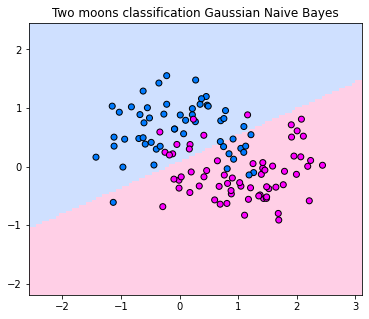

In [107]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.datasets import make_moons


X,y = make_moons(noise=0.3, random_state=0, n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

_, ax = plt.subplots(ncols=1, figsize=(12, 5))
cm = ListedColormap(["#a0c3ff", "#ffa1cf"])
cm_points = ListedColormap(["#007bff", "magenta"])
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    gnb,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.5,
    ax=ax,
    cmap=cm,
)
scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k",cmap = cm_points)
_ = disp.ax_.set_title(
    f"Two moons classification Gaussian Naive Bayes"
)
ax.axis('scaled')

plt.show()


### Training
Naive Bayes doesn't need training in the classical sense, but to enable a quick inference of a naive Bayes classifier, the required probabilities, respectively their parameters are stored in advance. That is, for discrete features we compute all log probabilities, and for continuous features we compute the estimation parameters $\mu_{kl}$ and $\sigma_{kl}$.
```{prf:algorithm} Naive Bayes (Gaussian and Multinomial)

**Input**: training data $\mathcal{D}$, $\alpha$
1. **for** $k\in\{1,\ldots,d\}$
    1. **if** $x_k$ is a discrete feature
        1. **for** $a\in\mathcal{X}_k$
            1. **for** $l\in\{1,\ldots, c\}$
                1. Store $\log p_\alpha(x_k=a\mid y=l)$
    2. **else**    
        1. **for** $l\in\{1,\ldots, c\}$
            1. Store $\mu_{kl}$ and $\sigma_{kl}$.
```